In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
admissiondf = pd.read_csv("C:\\Users\\adesh\\OneDrive\\Desktop\ML\\Admission_Predict.csv")

In [3]:
admissiondf.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
x = admissiondf[['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']]

y = admissiondf["Chance of Admit "]

In [5]:
y_c = [1 if each > 0.8 else 0 for each in y]

In [6]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y_c, test_size=0.20, random_state=101)

In [7]:
# from sklearn import linear_model
# from sklearn.linear_model import LinearRegression

In [8]:
# reg = linear_model.LinearRegression()
# model=reg.fit(x_train,y_train)

In [9]:
# y_pred = model.predict(x_test)
# >>> print('Predicted responce : ',y_pred,sep="\n")

# Decision Tree 

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_curve,auc,classification_report

In [11]:
modeldec = DecisionTreeClassifier(random_state=1,max_depth=2,criterion='gini').fit(x_train,y_train)

In [12]:
# modeldec1 = DecisionTreeClassifier(random_state=0, max_depth=2, criterion='entropy').fit(x_train,y_train)

In [13]:
predictedoutput=modeldec.predict(x_test)

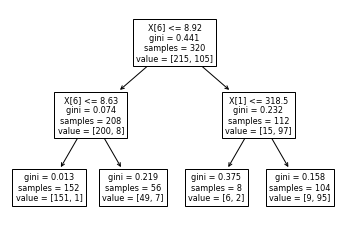

In [14]:
from sklearn import tree
tree.plot_tree(modeldec);

In [15]:
y_pred=modeldec.predict(x_test)

In [16]:
print(y_pred)

[0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 0]


In [17]:
from sklearn import metrics

In [18]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.925


In [19]:
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))

Confusion Matrix :
 [[64  4]
 [ 2 10]]


In [20]:
# eda
# find null value
# if null then replace with mean 


# Loan Dataset

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("C:\\Users\\adesh\\OneDrive\\Desktop\ML\\Loan.csv")

In [23]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [25]:
df_encoded=df.copy()
df_encoded.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [26]:
print(df_encoded['Gender'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64


In [27]:
df_encoded['Gender'].fillna('Male',inplace=True)
df_encoded['Married'].fillna('Yes',inplace=True)
df_encoded['Dependents'].fillna(0, inplace=True) 
df_encoded['Self_Employed'].fillna( 'No',inplace=True)
df_encoded['LoanAmount'].fillna(df_encoded ['LoanAmount'].mean(), inplace=True)
df_encoded['Loan_Amount_Term'].fillna(df_encoded['Loan_Amount_Term'].mean(), inplace=True)
df_encoded['Credit_History'].fillna(1.0,inplace=True)

In [28]:
df_encoded.Gender.replace(('Male','Female'),(1,0),inplace=True)

In [29]:
df_encoded.Married.replace(('Yes','No'),(1,0),inplace=True)

In [30]:
df_encoded.Education.replace(('Graduate','Not Graduate'),(1,0),inplace=True)

In [31]:
df_encoded.Self_Employed.replace(('Yes','No'),(1,0),inplace=True)

In [32]:
df_encoded.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,1,1,0.0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,1,0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [34]:
df_encoded["Loan_ID"]=le.fit_transform(df_encoded ["Loan_ID"].values)
df_encoded['Gender' ]-le.fit_transform(df_encoded[ "Gender"].values)
df_encoded[ 'Married']=le.fit_transform(df_encoded['Married'].values)
df_encoded[ "Dependents"]=le.fit_transform(df_encoded[ 'Dependents'].values)
df_encoded[ "Education"]=le.fit_transform(df_encoded['Education'].values)
df_encoded["Self_Employed" ]=le.fit_transform(df_encoded['Self_Employed'].values) 
df_encoded[ 'Credit_History' ]=le.fit_transform(df_encoded ['Credit_History'].values)
df_encoded["Property_Area" ]=le.fit_transform(df_encoded['Property_Area'].values)
df_encoded['Loan_Status']=le.fit_transform(df_encoded['Loan_Status'].values) 
df_encoded[ 'ApplicantIncome' ]-le.fit_transform(df_encoded['ApplicantIncome'].values) 
df_encoded['CoapplicantIncome']=le.fit_transform(df_encoded ['CoapplicantIncome'].values)
df_encoded[ 'LoanAmount']=le.fit_transform(df_encoded['LoanAmount'].values)
df_encoded[ 'Loan_Amount_Tere']=le.fit_transform(df_encoded['Loan_Amount_Term'].values)